✅ Daten gespeichert in: active_learning_results/active_learning_data.csv
✅ Hauptplot gespeichert in: active_learning_results\active_learning_analysis_20250819_212824.png


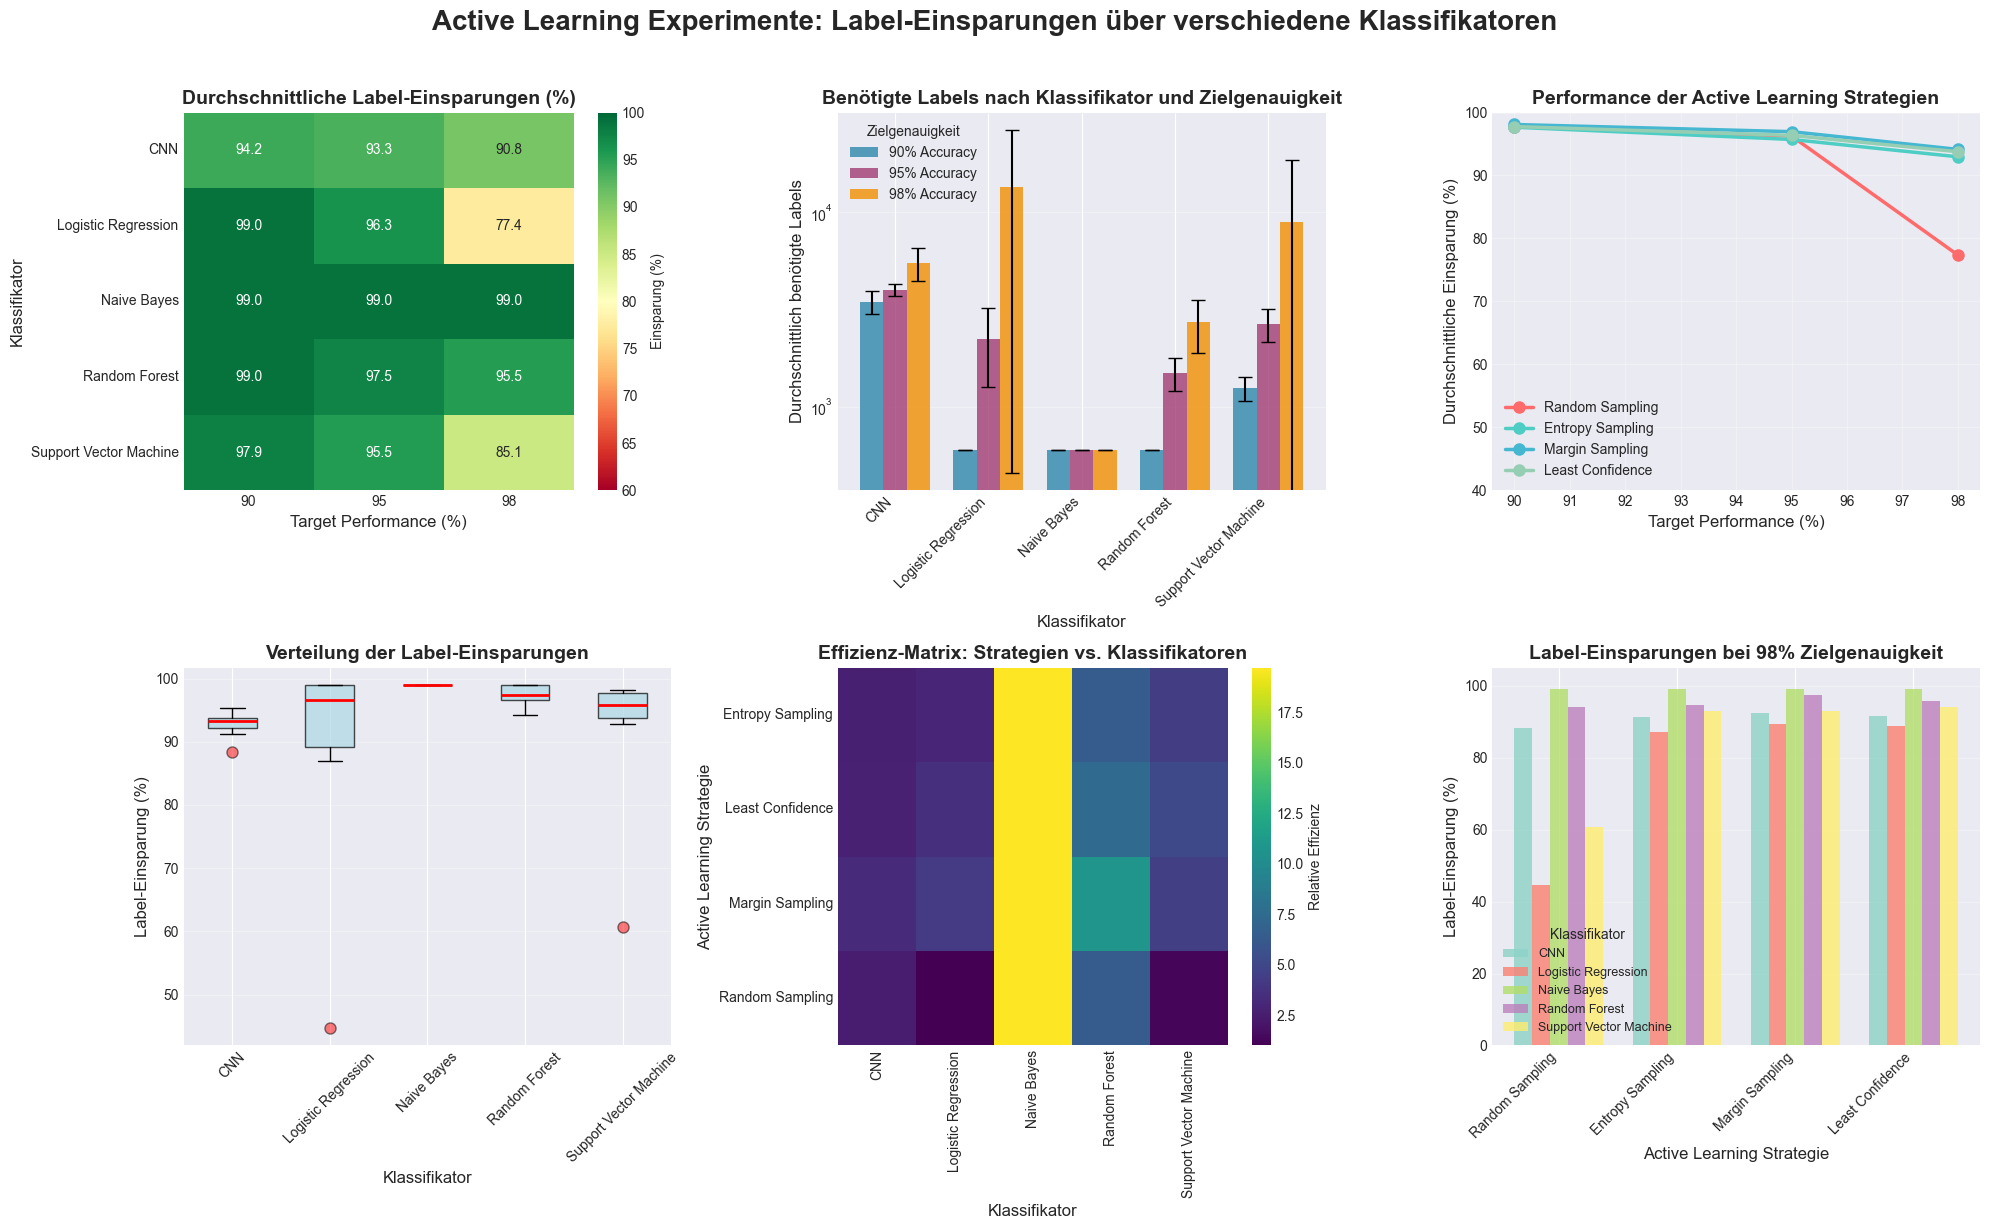


📊 Erstelle und speichere einzelne Plots...
✅ Heatmaps gespeichert


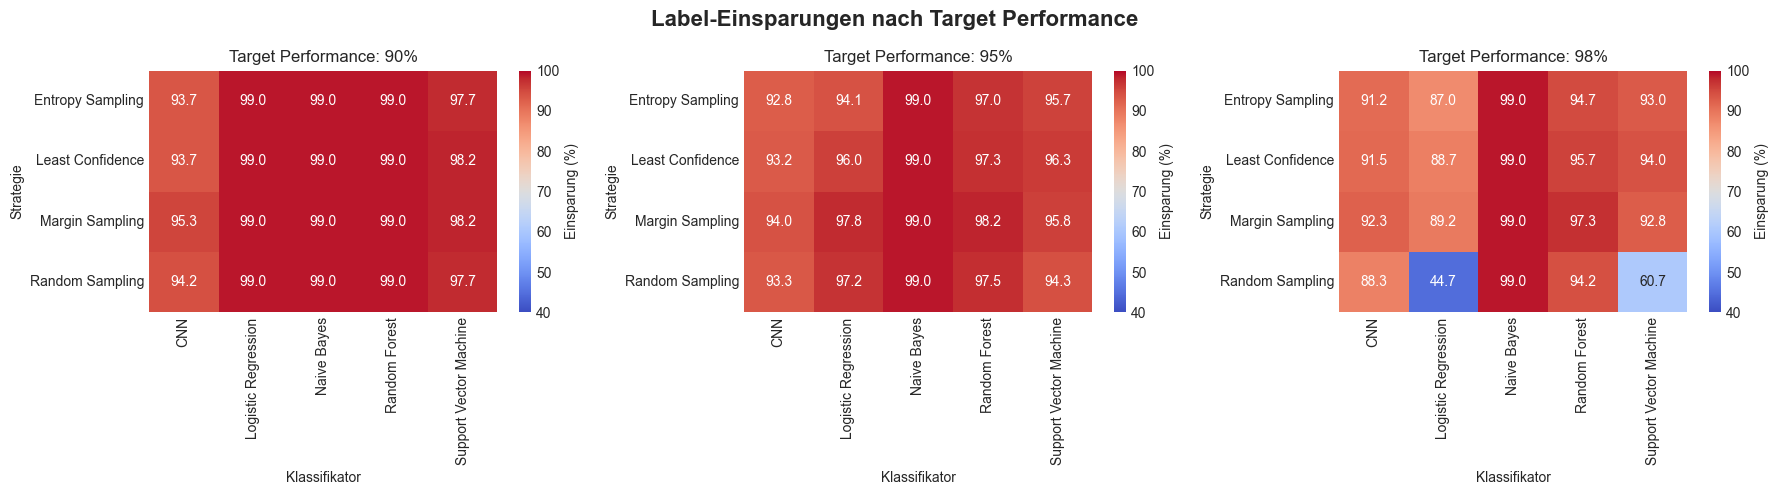

✅ Individuelle Klassifikator-Analysen gespeichert


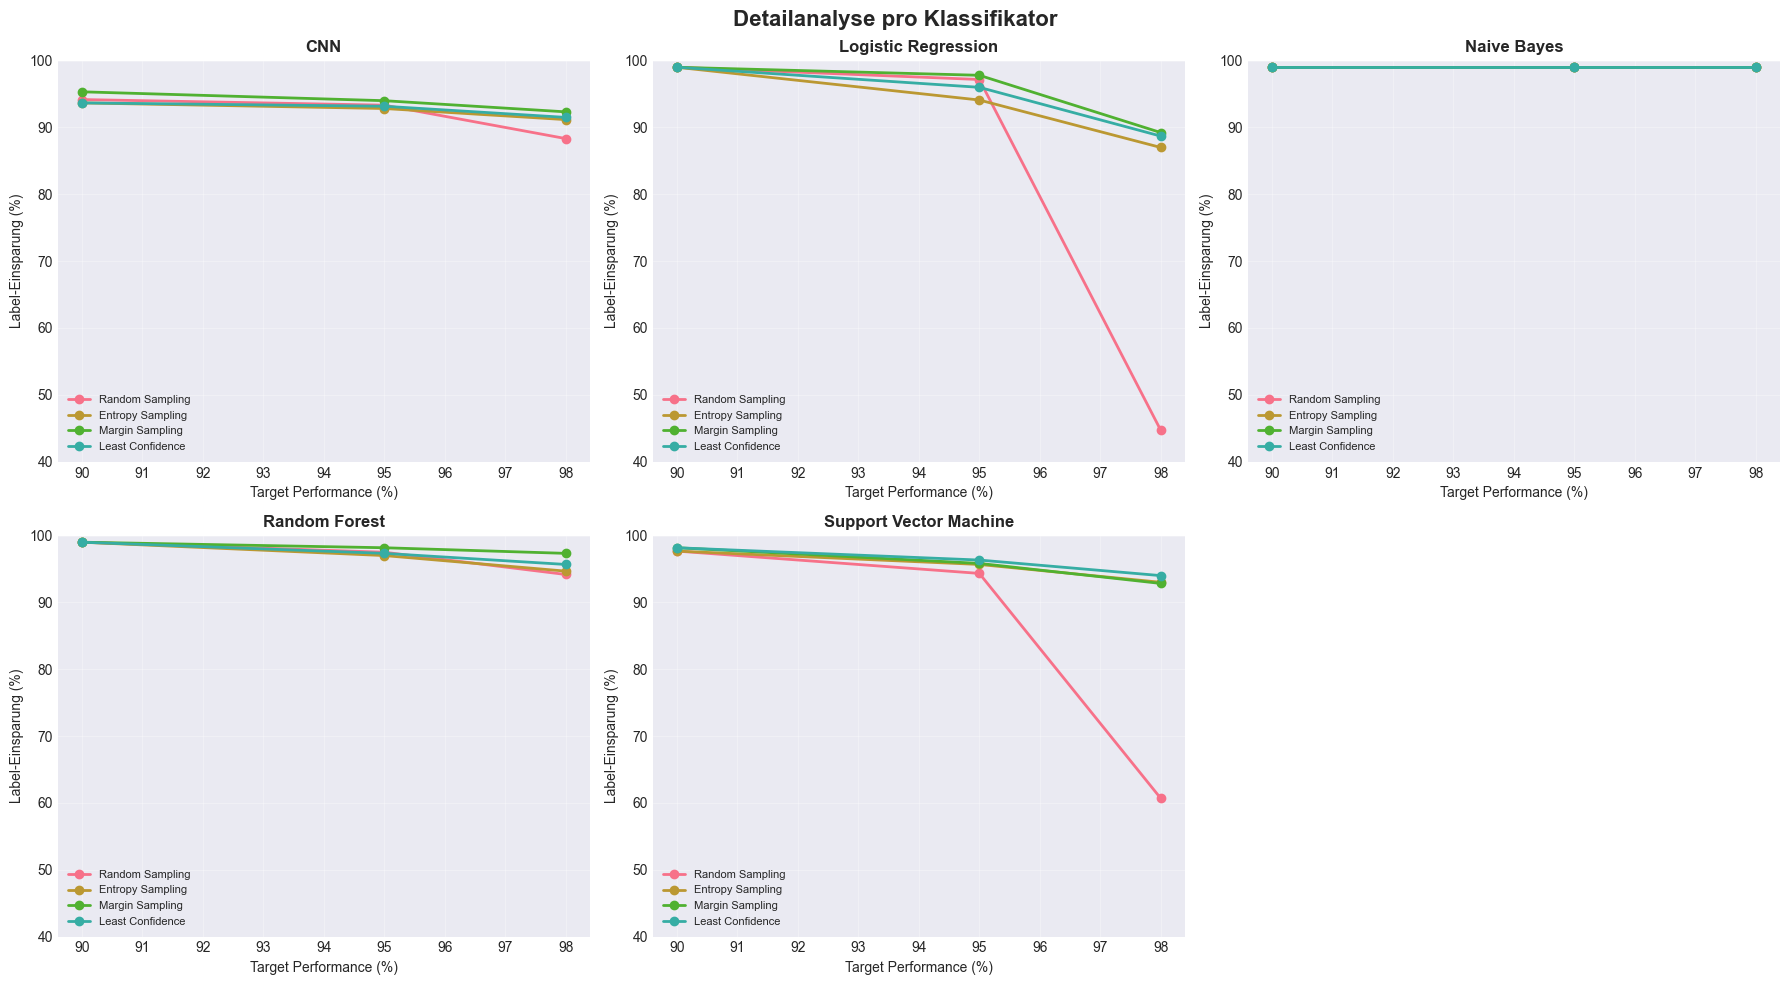


📝 Erstelle statistische Zusammenfassung...
✅ Statistische Zusammenfassung gespeichert

📄 Erstelle LaTeX-Tabelle...
✅ LaTeX-Tabelle gespeichert

🎉 ALLE DATEIEN ERFOLGREICH GESPEICHERT IN: active_learning_results/

Gespeicherte Dateien:
  1. active_learning_data.csv - Rohdaten
  2. active_learning_analysis_20250819_212824.png - Hauptvisualisierung
  3. heatmaps_by_performance_20250819_212824.png - Detaillierte Heatmaps
  4. individual_classifier_analysis_20250819_212824.png - Einzelanalysen
  5. statistical_summary_20250819_212824.txt - Statistische Zusammenfassung
  6. results_table_20250819_212824.tex - LaTeX-Tabelle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

# Erstelle Output-Verzeichnis falls nicht vorhanden
output_dir = 'active_learning_results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Setze Style für professionelle Plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Datenextraktion aus den Bildern
# CNN Daten (Bild 1)
cnn_data = {
    'strategy': ['Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence'],
    'target_performance': [90, 90, 90, 90, 95, 95, 95, 95, 98, 98, 98, 98],
    'target_accuracy': [0.895806, 0.895806, 0.895806, 0.895806, 0.945573, 0.945573, 0.945573, 0.945573,
                        0.9754332, 0.9754332, 0.9754332, 0.9754332],
    'avg_labels_needed': [3500, 3800, 2800, 3800, 4000, 4300, 3600, 4100, 7000, 5300, 4600, 5100],
    'savings_pct': [94.17, 93.67, 95.33, 93.67, 93.33, 92.83, 94, 93.17, 88.33, 91.17, 92.33, 91.5],
    'classifier': 'CNN'
}

# Logistic Regression Daten (Bild 2)
lr_data = {
    'strategy': ['Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence'],
    'target_performance': [90, 90, 90, 90, 95, 95, 95, 95, 98, 98, 98, 98],
    'target_accuracy': [0.82917, 0.82917, 0.82917, 0.82917, 0.875235, 0.875235, 0.875235, 0.875235,
                        0.902874, 0.902874, 0.902874, 0.902874],
    'avg_labels_needed': [600, 600, 600, 600, 1700, 3540, 1320, 2400, 33192, 7800, 6460, 6780],
    'savings_pct': [99, 99, 99, 99, 97.17, 94.1, 97.8, 96, 44.68, 87, 89.23, 88.7],
    'classifier': 'Logistic Regression'
}

# Naive Bayes Daten (Bild 3)
nb_data = {
    'strategy': ['Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence'],
    'target_performance': [90, 90, 90, 90, 95, 95, 95, 95, 98, 98, 98, 98],
    'target_accuracy': [0.0882, 0.0882, 0.0882, 0.0882, 0.0931, 0.0931, 0.0931, 0.0931,
                        0.09604, 0.09604, 0.09604, 0.09604],
    'avg_labels_needed': [600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600],
    'savings_pct': [99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99],
    'classifier': 'Naive Bayes'
}

# Random Forest Daten (Bild 4)
rf_data = {
    'strategy': ['Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence'],
    'target_performance': [90, 90, 90, 90, 95, 95, 95, 95, 98, 98, 98, 98],
    'target_accuracy': [0.834174, 0.834174, 0.834174, 0.834174, 0.880517, 0.880517, 0.880517, 0.880517,
                        0.9083228, 0.9083228, 0.9083228, 0.9083228],
    'avg_labels_needed': [600, 600, 600, 600, 1500, 1800, 1100, 1600, 3500, 3200, 1600, 2600],
    'savings_pct': [99, 99, 99, 99, 97.5, 97, 98.17, 97.33, 94.17, 94.67, 97.33, 95.67],
    'classifier': 'Random Forest'
}

# Support Vector Machine Daten (Bild 5)
svm_data = {
    'strategy': ['Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence',
                 'Random Sampling', 'Entropy Sampling', 'Margin Sampling', 'Least Confidence'],
    'target_performance': [90, 90, 90, 90, 95, 95, 95, 95, 98, 98, 98, 98],
    'target_accuracy': [0.86958, 0.86958, 0.86958, 0.86958, 0.91789, 0.91789, 0.91789, 0.91789,
                        0.946876, 0.946876, 0.946876, 0.946876],
    'avg_labels_needed': [1400, 1400, 1100, 1100, 3400, 2600, 2500, 2200, 23600, 4200, 4300, 3600],
    'savings_pct': [97.67, 97.67, 98.17, 98.17, 94.33, 95.67, 95.83, 96.33, 60.67, 93, 92.83, 94],
    'classifier': 'Support Vector Machine'
}

# Kombiniere alle Daten in einen DataFrame
all_data = []
for data in [cnn_data, lr_data, nb_data, rf_data, svm_data]:
    df = pd.DataFrame(data)
    all_data.append(df)

df_combined = pd.concat(all_data, ignore_index=True)

# Speichere die kombinierten Daten als CSV
df_combined.to_csv(os.path.join(output_dir, 'active_learning_data.csv'), index=False)
print(f"✅ Daten gespeichert in: {output_dir}/active_learning_data.csv")

# Erstelle Figure mit mehreren Subplots
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Active Learning Experimente: Label-Einsparungen über verschiedene Klassifikatoren', 
             fontsize=20, fontweight='bold', y=1.02)

# ================== PLOT 1: Label-Einsparungen nach Klassifikator und Target Performance ==================
ax1 = plt.subplot(2, 3, 1)
pivot_savings = df_combined.pivot_table(values='savings_pct', 
                                        index='classifier', 
                                        columns='target_performance', 
                                        aggfunc='mean')
sns.heatmap(pivot_savings, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=60, vmax=100, cbar_kws={'label': 'Einsparung (%)'})
ax1.set_title('Durchschnittliche Label-Einsparungen (%)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Target Performance (%)', fontsize=12)
ax1.set_ylabel('Klassifikator', fontsize=12)

# ================== PLOT 2: Benötigte Labels nach Klassifikator ==================
ax2 = plt.subplot(2, 3, 2)
colors = ['#2E86AB', '#A23B72', '#F18F01']
positions = np.arange(len(df_combined['classifier'].unique()))
width = 0.25

for i, perf in enumerate([90, 95, 98]):
    data_perf = df_combined[df_combined['target_performance'] == perf]
    means = data_perf.groupby('classifier')['avg_labels_needed'].mean()
    stds = data_perf.groupby('classifier')['avg_labels_needed'].std()
    
    ax2.bar(positions + i*width, means, width, label=f'{perf}% Accuracy', 
            color=colors[i], alpha=0.8, yerr=stds, capsize=5)

ax2.set_xlabel('Klassifikator', fontsize=12)
ax2.set_ylabel('Durchschnittlich benötigte Labels', fontsize=12)
ax2.set_title('Benötigte Labels nach Klassifikator und Zielgenauigkeit', fontsize=14, fontweight='bold')
ax2.set_xticks(positions + width)
ax2.set_xticklabels(df_combined['classifier'].unique(), rotation=45, ha='right')
ax2.legend(title='Zielgenauigkeit')
ax2.grid(axis='y', alpha=0.3)
ax2.set_yscale('log')

# ================== PLOT 3: Vergleich der Active Learning Strategien ==================
ax3 = plt.subplot(2, 3, 3)
strategy_colors = {'Random Sampling': '#FF6B6B', 'Entropy Sampling': '#4ECDC4', 
                  'Margin Sampling': '#45B7D1', 'Least Confidence': '#96CEB4'}

for strategy in df_combined['strategy'].unique():
    strategy_data = df_combined[df_combined['strategy'] == strategy]
    grouped = strategy_data.groupby('target_performance')['savings_pct'].mean()
    ax3.plot(grouped.index, grouped.values, marker='o', linewidth=2.5, 
            markersize=8, label=strategy, color=strategy_colors[strategy])

ax3.set_xlabel('Target Performance (%)', fontsize=12)
ax3.set_ylabel('Durchschnittliche Einsparung (%)', fontsize=12)
ax3.set_title('Performance der Active Learning Strategien', fontsize=14, fontweight='bold')
ax3.legend(loc='best', framealpha=0.9)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([40, 100])

# ================== PLOT 4: Box-Plot für Label-Einsparungen ==================
ax4 = plt.subplot(2, 3, 4)
box_data = []
labels = []
for clf in df_combined['classifier'].unique():
    clf_data = df_combined[df_combined['classifier'] == clf]['savings_pct']
    box_data.append(clf_data)
    labels.append(clf)

bp = ax4.boxplot(box_data, labels=labels, patch_artist=True, 
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.5))

ax4.set_ylabel('Label-Einsparung (%)', fontsize=12)
ax4.set_xlabel('Klassifikator', fontsize=12)
ax4.set_title('Verteilung der Label-Einsparungen', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# ================== PLOT 5: Effizienz-Matrix ==================
ax5 = plt.subplot(2, 3, 5)
efficiency_matrix = df_combined.pivot_table(
    values='avg_labels_needed',
    index='strategy',
    columns='classifier',
    aggfunc='mean'
)

# Invertiere für Effizienz (weniger Labels = besser)
efficiency_matrix = 1 / (efficiency_matrix / efficiency_matrix.max().max())

sns.heatmap(efficiency_matrix, annot=False, cmap='viridis', 
            cbar_kws={'label': 'Relative Effizienz'})
ax5.set_title('Effizienz-Matrix: Strategien vs. Klassifikatoren', fontsize=14, fontweight='bold')
ax5.set_xlabel('Klassifikator', fontsize=12)
ax5.set_ylabel('Active Learning Strategie', fontsize=12)

# ================== PLOT 6: Performance bei 98% Target ==================
ax6 = plt.subplot(2, 3, 6)
df_98 = df_combined[df_combined['target_performance'] == 98]

x = np.arange(len(df_98['strategy'].unique()))
width = 0.15
classifiers = df_98['classifier'].unique()
colors_clf = plt.cm.Set3(np.linspace(0, 1, len(classifiers)))

for i, clf in enumerate(classifiers):
    clf_data = df_98[df_98['classifier'] == clf]
    values = []
    for strategy in df_98['strategy'].unique():
        val = clf_data[clf_data['strategy'] == strategy]['savings_pct'].values
        values.append(val[0] if len(val) > 0 else 0)
    
    ax6.bar(x + i*width, values, width, label=clf, color=colors_clf[i], alpha=0.8)

ax6.set_xlabel('Active Learning Strategie', fontsize=12)
ax6.set_ylabel('Label-Einsparung (%)', fontsize=12)
ax6.set_title('Label-Einsparungen bei 98% Zielgenauigkeit', fontsize=14, fontweight='bold')
ax6.set_xticks(x + width * 2)
ax6.set_xticklabels(df_98['strategy'].unique(), rotation=45, ha='right')
ax6.legend(title='Klassifikator', loc='lower left', fontsize=9)
ax6.grid(axis='y', alpha=0.3)
ax6.set_ylim([0, 105])

plt.tight_layout()

# Speichere die Hauptvisualisierung
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
main_plot_path = os.path.join(output_dir, f'active_learning_analysis_{timestamp}.png')
plt.savefig(main_plot_path, dpi=300, bbox_inches='tight')
print(f"✅ Hauptplot gespeichert in: {main_plot_path}")

plt.show()

# ================== EINZELNE PLOTS SPEICHERN ==================
print("\n📊 Erstelle und speichere einzelne Plots...")

# Plot 1: Heatmap für jede Target Performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Label-Einsparungen nach Target Performance', fontsize=16, fontweight='bold')

for idx, perf in enumerate([90, 95, 98]):
    ax = axes[idx]
    df_perf = df_combined[df_combined['target_performance'] == perf]
    pivot = df_perf.pivot_table(values='savings_pct', index='strategy', columns='classifier')
    
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='coolwarm', vmin=40, vmax=100, ax=ax,
                cbar_kws={'label': 'Einsparung (%)'})
    ax.set_title(f'Target Performance: {perf}%', fontsize=12)
    ax.set_xlabel('Klassifikator', fontsize=10)
    ax.set_ylabel('Strategie', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f'heatmaps_by_performance_{timestamp}.png'), dpi=300, bbox_inches='tight')
print(f"✅ Heatmaps gespeichert")
plt.show()

# Plot 2: Individuelle Klassifikator-Performance
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Detailanalyse pro Klassifikator', fontsize=16, fontweight='bold')

classifiers = df_combined['classifier'].unique()
for idx, clf in enumerate(classifiers):
    ax = axes[idx // 3, idx % 3]
    clf_data = df_combined[df_combined['classifier'] == clf]
    
    for strategy in clf_data['strategy'].unique():
        strategy_data = clf_data[clf_data['strategy'] == strategy]
        ax.plot(strategy_data['target_performance'], strategy_data['savings_pct'], 
               marker='o', label=strategy, linewidth=2)
    
    ax.set_title(f'{clf}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Target Performance (%)')
    ax.set_ylabel('Label-Einsparung (%)')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([40, 100])

# Lösche den zusätzlichen subplot
if len(classifiers) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f'individual_classifier_analysis_{timestamp}.png'), dpi=300, bbox_inches='tight')
print(f"✅ Individuelle Klassifikator-Analysen gespeichert")
plt.show()

# ================== STATISTISCHE ZUSAMMENFASSUNG SPEICHERN ==================
print("\n📝 Erstelle statistische Zusammenfassung...")

with open(os.path.join(output_dir, f'statistical_summary_{timestamp}.txt'), 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("ACTIVE LEARNING EXPERIMENTE - STATISTISCHE ZUSAMMENFASSUNG\n")
    f.write("="*80 + "\n\n")
    
    # Beste Kombinationen
    f.write("📊 TOP 10 BESTE KOMBINATIONEN (höchste Label-Einsparungen):\n")
    f.write("-" * 60 + "\n")
    top_combinations = df_combined.nlargest(10, 'savings_pct')[['classifier', 'strategy', 'target_performance', 'savings_pct', 'avg_labels_needed']]
    for idx, row in top_combinations.iterrows():
        f.write(f"Rang {idx+1:2d}: {row['classifier']:25s} | {row['strategy']:20s} | Target: {row['target_performance']}% | Einsparung: {row['savings_pct']:5.1f}% | Labels: {row['avg_labels_needed']:8.0f}\n")
    
    # Durchschnittliche Einsparungen pro Klassifikator
    f.write("\n\n📈 DURCHSCHNITTLICHE EINSPARUNGEN PRO KLASSIFIKATOR:\n")
    f.write("-" * 60 + "\n")
    avg_savings = df_combined.groupby('classifier')['savings_pct'].agg(['mean', 'std', 'min', 'max'])
    for clf, row in avg_savings.iterrows():
        f.write(f"{clf:25s} | Mittel: {row['mean']:5.1f}% | Std: {row['std']:5.1f}% | Min: {row['min']:5.1f}% | Max: {row['max']:5.1f}%\n")
    
    # Durchschnittliche Einsparungen pro Strategie
    f.write("\n\n🎯 DURCHSCHNITTLICHE EINSPARUNGEN PRO STRATEGIE:\n")
    f.write("-" * 60 + "\n")
    avg_strategy = df_combined.groupby('strategy')['savings_pct'].agg(['mean', 'std', 'min', 'max'])
    for strategy, row in avg_strategy.iterrows():
        f.write(f"{strategy:25s} | Mittel: {row['mean']:5.1f}% | Std: {row['std']:5.1f}% | Min: {row['min']:5.1f}% | Max: {row['max']:5.1f}%\n")
    
    # Beste Strategie pro Klassifikator
    f.write("\n\n🏆 BESTE STRATEGIE PRO KLASSIFIKATOR:\n")
    f.write("-" * 60 + "\n")
    best_strategy = df_combined.groupby(['classifier', 'strategy'])['savings_pct'].mean().reset_index()
    best_per_clf = best_strategy.loc[best_strategy.groupby('classifier')['savings_pct'].idxmax()]
    for _, row in best_per_clf.iterrows():
        f.write(f"{row['classifier']:25s} | {row['strategy']:20s} | Durchschnitt: {row['savings_pct']:5.1f}%\n")
    
    # Durchschnittlich benötigte Labels
    f.write("\n\n📉 DURCHSCHNITTLICH BENÖTIGTE LABELS PRO KLASSIFIKATOR:\n")
    f.write("-" * 60 + "\n")
    avg_labels = df_combined.groupby(['classifier', 'target_performance'])['avg_labels_needed'].mean().reset_index()
    for clf in df_combined['classifier'].unique():
        clf_labels = avg_labels[avg_labels['classifier'] == clf]
        f.write(f"\n{clf}:\n")
        for _, row in clf_labels.iterrows():
            f.write(f"  Target {row['target_performance']}%: {row['avg_labels_needed']:8.1f} Labels\n")
    
    # Korrelationsanalyse
    f.write("\n\n🔍 KORRELATIONSANALYSE:\n")
    f.write("-" * 60 + "\n")
    for clf in df_combined['classifier'].unique():
        clf_data = df_combined[df_combined['classifier'] == clf]
        corr_perf_labels = clf_data['target_performance'].corr(clf_data['avg_labels_needed'])
        corr_perf_savings = clf_data['target_performance'].corr(clf_data['savings_pct'])
        f.write(f"{clf:25s} | Target vs. Labels: {corr_perf_labels:+.3f} | Target vs. Einsparung: {corr_perf_savings:+.3f}\n")

print(f"✅ Statistische Zusammenfassung gespeichert")

# ================== LATEX TABELLE ERSTELLEN ==================
print("\n📄 Erstelle LaTeX-Tabelle...")

latex_table = df_combined.pivot_table(
    values='savings_pct',
    index=['classifier', 'strategy'],
    columns='target_performance',
    aggfunc='mean'
).round(1)

with open(os.path.join(output_dir, f'results_table_{timestamp}.tex'), 'w') as f:
    f.write("% LaTeX Tabelle für Active Learning Ergebnisse\n")
    f.write("\\begin{table}[h]\n")
    f.write("\\centering\n")
    f.write("\\caption{Label-Einsparungen (\\%) für verschiedene Klassifikatoren und Active Learning Strategien}\n")
    f.write("\\begin{tabular}{llrrr}\n")
    f.write("\\toprule\n")
    f.write("Klassifikator & Strategie & 90\\% & 95\\% & 98\\% \\\\\n")
    f.write("\\midrule\n")
    
    for (clf, strategy), row in latex_table.iterrows():
        f.write(f"{clf} & {strategy} & {row[90]:.1f} & {row[95]:.1f} & {row[98]:.1f} \\\\\n")
    
    f.write("\\bottomrule\n")
    f.write("\\end{tabular}\n")
    f.write("\\end{table}\n")

print(f"✅ LaTeX-Tabelle gespeichert")

print("\n" + "="*80)
print(f"🎉 ALLE DATEIEN ERFOLGREICH GESPEICHERT IN: {output_dir}/")
print("="*80)
print("\nGespeicherte Dateien:")
print(f"  1. active_learning_data.csv - Rohdaten")
print(f"  2. active_learning_analysis_{timestamp}.png - Hauptvisualisierung")
print(f"  3. heatmaps_by_performance_{timestamp}.png - Detaillierte Heatmaps")
print(f"  4. individual_classifier_analysis_{timestamp}.png - Einzelanalysen")
print(f"  5. statistical_summary_{timestamp}.txt - Statistische Zusammenfassung")
print(f"  6. results_table_{timestamp}.tex - LaTeX-Tabelle")